In [196]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [197]:
#%% Leer csv Titanic
df_pasajeros = pd.read_csv('Titanic.csv', sep = ',')
df_pasajeros.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_pasajeros.info()

In [198]:
unique_cabins = df_pasajeros['Cabin'].unique()

print(unique_cabins)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [199]:
df_pasajeros['Cabin'] = df_pasajeros['Cabin'].replace('nan', pd.NA)

num_nan_cabin = df_pasajeros['Cabin'].isna().sum()

print(num_nan_cabin)

687


In [200]:
# %% Graficar la matriz de correlacion de df_pasajeros sin columna 'name'
#plt.figure(figsize = (10, 6))

df_pasajeros['Age'] = df_pasajeros['Age'].fillna(df_pasajeros['Age'].median())

df_pasajeros['Sex'] = df_pasajeros['Sex'].map({'male': 0, 'female': 1})

df_pasajeros.drop(columns = ['Name','PassengerId', 'Cabin', 'Ticket', 'Embarked'], inplace = True)



In [201]:
df_pasajeros

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


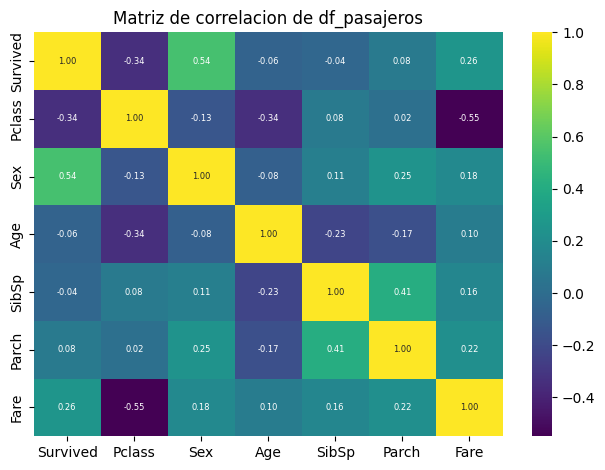

In [202]:
ax = sns.heatmap(df_pasajeros.corr(), fmt='.2f', annot = True, annot_kws={"size": 6}, cmap='viridis')
plt.title('Matriz de correlacion de df_pasajeros')
plt.tight_layout()
for text in ax.texts:
    text.set_horizontalalignment('center')  # Asegura que el texto esté centrado
    text.set_verticalalignment('center')    # Asegura que el texto esté centrado
plt.show()

In [203]:
# Realizar analisis de componentes principales
#%% Elegir solo las variables numericas
df_pasajeros_num = df_pasajeros.select_dtypes(include = ['float64', 'int64'])

#%% Normalizar los datos
scaler = StandardScaler()
df_pasajeros_norm = scaler.fit_transform(df_pasajeros_num)

#%% Crear objeto PCA
pca = PCA(n_components = 9)

#%% Ajustar y transformar los datos
pca_pasajeros = pca.fit_transform(df_pasajeros_norm)

#%% Crear dataframe con los datos transformados
df_pca_pasajeros = pd.DataFrame(data = pca_pasajeros, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

#%% Realizar biplot mostrando los componentes principales y las variables originales
def biplot(etiquetas, columnas, df_pca, pca, componente_x, componente_y, title = 'Biplot', incluir_nombres = False):
    plt.figure(figsize = (10, 6))
    pcx_txt = f'PC{componente_x}'
    pcy_txt = f'PC{componente_y}'
    plt.scatter(df_pca[pcx_txt], df_pca[pcy_txt], alpha = 0.5)
    plt.title(title)
    plt.xlabel(f'{pcx_txt} {round(pca.explained_variance_ratio_[componente_x-1] * 100, 2)}%')
    plt.ylabel(f'{pcy_txt} {round(pca.explained_variance_ratio_[componente_y-1] * 100, 2)}%')
    for i, (pc1, pc2) in enumerate(zip(pca.components_[componente_x-1], pca.components_[componente_y-1])):
        # Aumentar tamaño de flechas
        pc1 *= 6
        pc2 *= 6
        plt.arrow(0, 0, pc1, pc2, head_width = 0.1, head_length = 0.1, linewidth = 2, color = 'red')
        plt.text(pc1, pc2, columnas[i+1], color = 'black', ha = 'right', va = 'bottom')
    # Mostrar el nombre en cada punto
    if incluir_nombres:
        for i, nombre in enumerate(etiquetas):
            plt.text(df_pca[pcx_txt][i], df_pca[pcy_txt][i], nombre, color = 'blue', ha = 'left', va = 'bottom')
    plt.grid()
    plt.show()

#%% Graficar biplot
biplot(df_pasajeros['country'], df_pasajeros.columns, df_pca_pasajeros, pca, componente_x = 1, componente_y = 2, title = 'Biplot de Titanic', incluir_nombres = False)

# %% Graficar la varianza explicada y acumulada en un único gráfico formado por dos subgráficos
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.title('Varianza explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.title('Varianza acumulada explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza acumulada')
plt.show()

# %% Graficar la matriz de correlacion de df_Titanic sin columna 'country'
plt.figure(figsize = (10, 6))
sns.heatmap(df_Titanic.drop(columns = 'country').corr(), annot = True)
plt.title('Matriz de correlacion de df_Titanic')
plt.show()

# %% Graficar la matriz de correlacion de los componentes principales
plt.figure(figsize = (10, 6))
sns.heatmap(df_pca_Titanic.corr(), annot = True)
plt.title('Matriz de correlacion de los componentes principales')
plt.show()

#%% Para cada columna imprimir el valor del componente principal correspondiente a PCx
def imprimir_componentes_principales(df, pca, componente_x):
    pcx_txt = f'PC{componente_x}'
    print(f'Componentes principales para {pcx_txt}')
    for i, columna in enumerate(df.columns):
        print(f'{columna}:'.ljust(15), f'{pca.components_[componente_x-1][i]:.2f}')
        
#%%
imprimir_componentes_principales(df_Titanic_num, pca, 2)
# %%


ValueError: n_components=9 must be between 0 and min(n_samples, n_features)=7 with svd_solver='covariance_eigh'